In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
pd.set_option('Display.max_columns', 27)

In [3]:
df = pd.read_csv('..//Dados/New_dados_challenge.csv')
df

,Idade,Salario_anual,Situacao_prop,Tempo_trabalho,Motivo_emprest,Pont_emprest,Total_emprest,Tx_juros,Possib_inadimp,Renda_pecentual,Periodo,Inadimplente
0,32.0,22704.0,Rent,4.0,Debtconsolidation,B,6800.0,NaN,0.0,0.30,8,N
1,34.0,222000.0,Mortgage,0.0,Medical,A,13000.0,8.49,0.0,0.06,7,N
2,35.0,48000.0,Own,6.0,Homeimprovement,C,4200.0,13.61,0.0,0.09,7,N
3,40.0,52000.0,Rent,2.0,Education,F,15000.0,18.62,1.0,0.29,17,Y
4,22.0,24000.0,Own,3.0,Education,B,6000.0,11.49,0.0,0.25,4,N
...,...,...,...,...,...,...,...,...,...,...,...,...
34480,22.0,59004.0,Rent,3.0,Education,B,5000.0,11.11,1.0,0.08,3,N
34481,28.0,36000.0,Mortgage,12.0,Medical,C,1925.0,15.23,0.0,0.05,8,Y
34482,30.0,95000.0,Mortgage,6.0,Homeimprovement,B,21000.0,11.99,0.0,0.22,5,N
34483,27.0,45600.0,Mortgage,6.0,Venture,A,15350.0,8.90,0.0,0.34,10,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            34165 non-null  float64
 1   Salario_anual    34150 non-null  float64
 2   Situacao_prop    34154 non-null  object 
 3   Tempo_trabalho   33231 non-null  float64
 4   Motivo_emprest   34174 non-null  object 
 5   Pont_emprest     34176 non-null  object 
 6   Total_emprest    34154 non-null  float64
 7   Tx_juros         30859 non-null  float64
 8   Possib_inadimp   34142 non-null  float64
 9   Renda_pecentual  34170 non-null  float64
 10  Periodo          34485 non-null  int64  
 11  Inadimplente     34119 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.2+ MB


> Como é possivel observar, existem muitas colunas com dados faltantes. A coluna que apresenta a maior quantidade de dados faltantes é a coluna Tx_juros com mais de 3600 registros nulos. 

In [5]:
# Realizando a seleção dos registros nulos na variável Target e os removendo.
df['Inadimplente'].fillna('', inplace = True)
index = df.query("Inadimplente == ''").index
df.drop(index = index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34119 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            33836 non-null  float64
 1   Salario_anual    33819 non-null  float64
 2   Situacao_prop    33820 non-null  object 
 3   Tempo_trabalho   32902 non-null  float64
 4   Motivo_emprest   33840 non-null  object 
 5   Pont_emprest     33846 non-null  object 
 6   Total_emprest    33820 non-null  float64
 7   Tx_juros         30563 non-null  float64
 8   Possib_inadimp   33814 non-null  float64
 9   Renda_pecentual  33835 non-null  float64
 10  Periodo          34119 non-null  int64  
 11  Inadimplente     34119 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.4+ MB


> Após realizar a remoção dos registros com dados faltantes na coluna Inadimplente, ainda existem 4 colunas que contêm dados nulos e que precisam do mesmo método de tratamento aplicado anteriomente. Após isso, tratarei as demais colunas por meio da subistituição dos valores pela média ou mediana. 

> Essas colunas são: **Situacao_prop**, **Motivo_emprest**, **Pont_emprest** e **Possib_inadimp**.

In [6]:
# Selecionando e removendo as linhas com dados nulos presentes na coluna Situação_prop.
df['Situacao_prop'].fillna('', inplace = True)
index = df.query("Situacao_prop == ''").index
df.drop(index = index, inplace = True)

In [7]:
# Selecionando e removendo as linhas com dados nulos presentes na coluna Motivo_emprest.
df['Motivo_emprest'].fillna('', inplace = True)
index = df.query("Motivo_emprest == ''").index
df.drop(index = index, inplace = True)

In [8]:
# Selecionando e removendo as linhas com dados nulos presentes na coluna Pont_emprest.
df['Pont_emprest'].fillna('', inplace = True)
index = df.query("Pont_emprest == ''").index
df.drop(index = index, inplace = True)

In [9]:
# Selecionando e removendo as linhas com dados nulos presentes na coluna Possib_inadimp.
df['Possib_inadimp'].fillna('', inplace = True)
index = df.query("Possib_inadimp == ''").index
df.drop(index = index, inplace = True)
df.reset_index(inplace = True, drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33129 entries, 0 to 33128
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            32952 non-null  float64
 1   Salario_anual    32966 non-null  float64
 2   Situacao_prop    33129 non-null  object 
 3   Tempo_trabalho   32049 non-null  float64
 4   Motivo_emprest   33129 non-null  object 
 5   Pont_emprest     33129 non-null  object 
 6   Total_emprest    32963 non-null  float64
 7   Tx_juros         29807 non-null  float64
 8   Possib_inadimp   33129 non-null  object 
 9   Renda_pecentual  32966 non-null  float64
 10  Periodo          33129 non-null  int64  
 11  Inadimplente     33129 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 3.0+ MB


> Depois de verificar os valores da média e da mediana da coluna **Tx_juros** e encontrar valores bem próximos, acredito que seja razoável substituir os valores faltantes por 11%.

> Na coluna **Tempo_trabalho** também apresenta comportamento semelhante e os resultados relativos a média e mediana são bem próximos, mesmo contendo Outlier. Deste modo, irei completar essas linhas nulas com 4 anos.

In [10]:
# Substituindo os valores faltantes da coluna tx de juros.
df['Tx_juros'].fillna(11, inplace = True)

In [11]:
# Substituindo os valores Nan da coluna Tempo de trabalho
df['Tempo_trabalho'].fillna(4, inplace = True)

> As demais colunas terão os dados ausentes substituídos pela **mediana** dos valores presentes na coluna, visto que são colunas que podem apresentar **Outliers**, além de possuir uma variação considerável nos dados, o que pode **distorcer a média**.

In [12]:
# Calculando a mediana e substituindo os valores faltantes(Salário anual)
mediana = df['Salario_anual'].median()
df['Salario_anual'].fillna(mediana, inplace = True)

In [13]:
# Calculando a mediana e substituindo os valores faltantes(Total Empréstimo)
mediana = df['Total_emprest'].median()
df['Total_emprest'].fillna(mediana, inplace = True)

In [14]:
# Calculando a mediana e substituindo os valores faltantes(Renda Percentual)
mediana = df['Renda_pecentual'].median()
df['Renda_pecentual'].fillna(mediana, inplace = True)

In [15]:
# Calculando a mediana e sustituindo os valores faltantes (Idade)
mediana = df['Idade'].median()
df['Idade'].fillna(mediana, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33129 entries, 0 to 33128
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idade            33129 non-null  float64
 1   Salario_anual    33129 non-null  float64
 2   Situacao_prop    33129 non-null  object 
 3   Tempo_trabalho   33129 non-null  float64
 4   Motivo_emprest   33129 non-null  object 
 5   Pont_emprest     33129 non-null  object 
 6   Total_emprest    33129 non-null  float64
 7   Tx_juros         33129 non-null  float64
 8   Possib_inadimp   33129 non-null  object 
 9   Renda_pecentual  33129 non-null  float64
 10  Periodo          33129 non-null  int64  
 11  Inadimplente     33129 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 3.0+ MB


In [17]:
df.isnull().sum()

Idade              0
Salario_anual      0
Situacao_prop      0
Tempo_trabalho     0
Motivo_emprest     0
Pont_emprest       0
Total_emprest      0
Tx_juros           0
Possib_inadimp     0
Renda_pecentual    0
Periodo            0
Inadimplente       0
dtype: int64

In [18]:
df.to_csv('../Dados/Dados_tratados.csv') #Salvando os dados já tratados

As colunas com dados ausentes foram tratadas e agora é possível processeguir com as próxima etapas.

## Visualizando a distribuição das variáveis

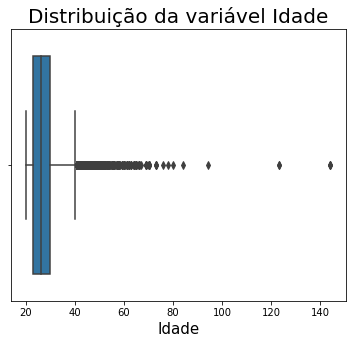

In [18]:
# Boxplot da variável Idade.
ax = sns.boxplot(x = 'Idade', data = df)
ax.figure.set_size_inches(6,5)
ax.set_title('Distribuição da variável Idade', fontsize = 20)
ax.set_xlabel('Idade', fontsize = 15)
ax = ax

> Existem registros de clientes com **mais de 120 anos**. Essas linhas **serão removidas** do conjunto de dados por se tratar de **Outliers**.

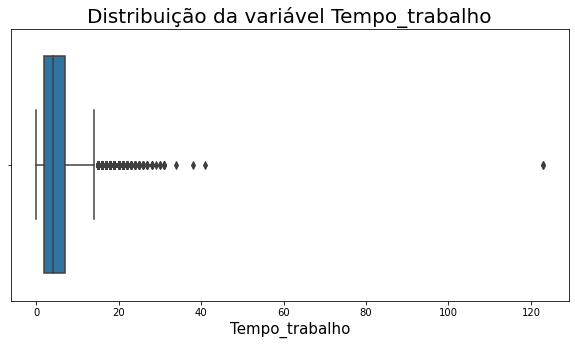

In [19]:
# Boxplot da variável Tempo_trabalho.
ax = sns.boxplot(x = 'Tempo_trabalho', data = df)
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição da variável Tempo_trabalho', fontsize = 20)
ax.set_xlabel('Tempo_trabalho', fontsize = 15)
ax = ax

> Nesta variável também existem valores que estão muito fora da realidade e por tanto, também serão removidos.

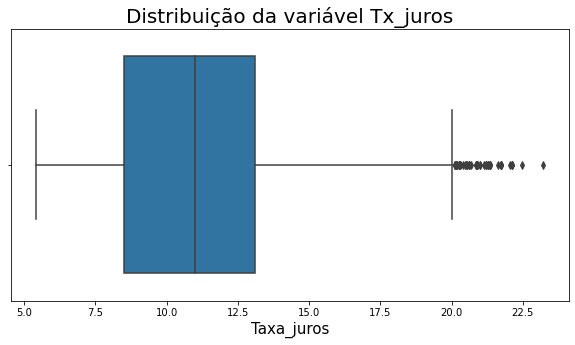

In [20]:
# Boxplot da variável Tx_juros.
ax = sns.boxplot(x = 'Tx_juros', data = df)
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição da variável Tx_juros', fontsize = 20)
ax.set_xlabel('Taxa_juros', fontsize = 15)
ax = ax

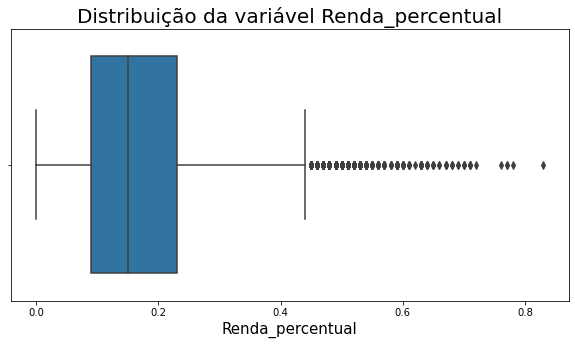

In [21]:
# Boxplot da variável Renda_pecentual.
ax = sns.boxplot(x = 'Renda_pecentual', data = df)
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição da variável Renda_percentual', fontsize = 20)
ax.set_xlabel('Renda_percentual', fontsize = 15)
ax = ax

> Apenas as colunas **Idade** e **Tempo_trabalho** apresentaram Outliers, esses registros serão removidos do conjunto de dados.

In [22]:
# Removendo as linhas dos Outliers da Idade
index = df.query('Idade > 100').index
df.drop(index = index, inplace = True)

In [23]:
# Removendo as linhas dos Outliers da coluna Tempo_trabalho
index = df.query('Tempo_trabalho > 60').index
df.drop(index = index, inplace = True)

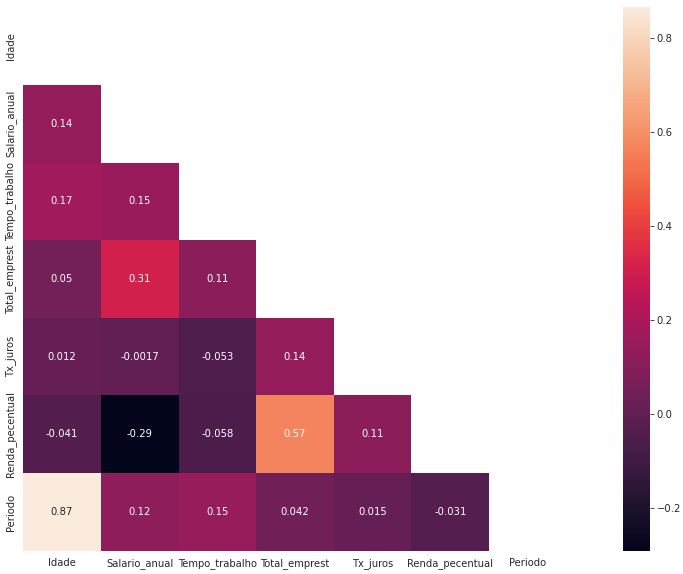

In [24]:
# Plotando a correlação entre as variáveis
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax =plt.subplots(figsize=(20,10))
    ax = sns.heatmap(corr, mask = mask, square = True, annot = True)

> A correlação entre as variáveis quantitativas presentes neste dataset é fraca em sua grande maioria.

In [25]:
# Observando as variáveis categóricas
for column in df[['Situacao_prop','Motivo_emprest','Pont_emprest','Inadimplente']].columns:
    print('------'*9)
    print(column)
    print(df[column].unique())

------------------------------------------------------
Situacao_prop
['Rent' 'Mortgage' 'Own' 'Other']
------------------------------------------------------
Motivo_emprest
['Debtconsolidation' 'Medical' 'Homeimprovement' 'Education' 'Personal'
 'Venture']
------------------------------------------------------
Pont_emprest
['B' 'A' 'C' 'F' 'D' 'E' 'G']
------------------------------------------------------
Inadimplente
['N' 'Y']


In [26]:
# Transformando os dados da variável Inadimplente (N:0 / Y:1).

df['Inadimplente'] = df['Inadimplente'].replace({'N':0, 'Y':1})
df = df.astype({'Possib_inadimp':int})

In [27]:
# Encoding das variáveis qualitativas.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas = ['Situacao_prop','Motivo_emprest','Pont_emprest']
encoding = make_column_transformer((OneHotEncoder(), colunas), remainder='passthrough')
feature = df.drop(columns = ['Possib_inadimp'])

new_df = encoding.fit_transform(feature)
new_df = pd.DataFrame(new_df, columns=encoding.get_feature_names_out())
new_df.head()

,onehotencoder__Situacao_prop_Mortgage,onehotencoder__Situacao_prop_Other,onehotencoder__Situacao_prop_Own,onehotencoder__Situacao_prop_Rent,onehotencoder__Motivo_emprest_Debtconsolidation,onehotencoder__Motivo_emprest_Education,onehotencoder__Motivo_emprest_Homeimprovement,onehotencoder__Motivo_emprest_Medical,onehotencoder__Motivo_emprest_Personal,onehotencoder__Motivo_emprest_Venture,onehotencoder__Pont_emprest_A,onehotencoder__Pont_emprest_B,onehotencoder__Pont_emprest_C,onehotencoder__Pont_emprest_D,onehotencoder__Pont_emprest_E,onehotencoder__Pont_emprest_F,onehotencoder__Pont_emprest_G,remainder__Idade,remainder__Salario_anual,remainder__Tempo_trabalho,remainder__Total_emprest,remainder__Tx_juros,remainder__Renda_pecentual,remainder__Periodo,remainder__Inadimplente
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,22704.0,4.0,6800.0,11.00,0.30,8.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,222000.0,0.0,13000.0,8.49,0.06,7.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0,48000.0,6.0,4200.0,13.61,0.09,7.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0,52000.0,2.0,15000.0,18.62,0.29,17.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,24000.0,3.0,6000.0,11.49,0.25,4.0,0.0


## Modelagem dos dados

In [28]:
# Realizando a divisão dos dados
X = new_df
y = df['Possib_inadimp']

In [29]:
#Normalização dos dados.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)
X1 = pd.DataFrame(X1, columns = encoding.get_feature_names_out())
X1

,onehotencoder__Situacao_prop_Mortgage,onehotencoder__Situacao_prop_Other,onehotencoder__Situacao_prop_Own,onehotencoder__Situacao_prop_Rent,onehotencoder__Motivo_emprest_Debtconsolidation,onehotencoder__Motivo_emprest_Education,onehotencoder__Motivo_emprest_Homeimprovement,onehotencoder__Motivo_emprest_Medical,onehotencoder__Motivo_emprest_Personal,onehotencoder__Motivo_emprest_Venture,onehotencoder__Pont_emprest_A,onehotencoder__Pont_emprest_B,onehotencoder__Pont_emprest_C,onehotencoder__Pont_emprest_D,onehotencoder__Pont_emprest_E,onehotencoder__Pont_emprest_F,onehotencoder__Pont_emprest_G,remainder__Idade,remainder__Salario_anual,remainder__Tempo_trabalho,remainder__Total_emprest,remainder__Tx_juros,remainder__Renda_pecentual,remainder__Periodo,remainder__Inadimplente
0,-0.838149,-0.056929,-0.293930,0.990804,2.288851,-0.496582,-0.353001,-0.478843,-0.451323,-0.461127,-0.703619,1.455924,-0.497196,-0.353812,-0.174521,-0.086147,-0.044,0.694316,-0.823326,-0.190760,-0.441258,-0.002528,1.220195,0.540705,-0.462523
1,1.193106,-0.056929,-0.293930,-1.009282,-0.436900,-0.496582,-0.353001,2.088368,-0.451323,-0.461127,1.421223,-0.686849,-0.497196,-0.353812,-0.174521,-0.086147,-0.044,1.017661,2.982747,-1.198072,0.541662,-0.818849,-1.033750,0.294137,-0.462523
2,-0.838149,-0.056929,3.402174,-1.009282,-0.436900,-0.496582,2.832855,-0.478843,-0.451323,-0.461127,-0.703619,-0.686849,2.011278,-0.353812,-0.174521,-0.086147,-0.044,1.179334,-0.340233,0.312896,-0.853450,0.846315,-0.752007,0.294137,-0.462523
3,-0.838149,-0.056929,-0.293930,0.990804,-0.436900,2.013765,-0.353001,-0.478843,-0.451323,-0.461127,-0.703619,-0.686849,-0.497196,-0.353812,-0.174521,11.608010,-0.044,1.987697,-0.263843,-0.694416,0.858733,2.475704,1.126280,2.759818,2.162057
4,-0.838149,-0.056929,3.402174,-1.009282,-0.436900,2.013765,-0.353001,-0.478843,-0.451323,-0.461127,-0.703619,1.455924,-0.497196,-0.353812,-0.174521,-0.086147,-0.044,-0.922411,-0.798575,-0.442588,-0.568086,0.156833,0.750623,-0.445567,-0.462523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33117,-0.838149,-0.056929,-0.293930,0.990804,-0.436900,2.013765,-0.353001,-0.478843,-0.451323,-0.461127,-0.703619,1.455924,-0.497196,-0.353812,-0.174521,-0.086147,-0.044,-0.922411,-0.130083,-0.442588,-0.726622,0.033247,-0.845921,-0.692136,-0.462523
33118,1.193106,-0.056929,-0.293930,-1.009282,-0.436900,-0.496582,-0.353001,2.088368,-0.451323,-0.461127,-0.703619,-0.686849,2.011278,-0.353812,-0.174521,-0.086147,-0.044,0.047625,-0.569404,1.823863,-1.214118,1.373184,-1.127664,0.540705,2.162057
33119,1.193106,-0.056929,-0.293930,-1.009282,-0.436900,-0.496582,2.832855,-0.478843,-0.451323,-0.461127,-0.703619,1.455924,-0.497196,-0.353812,-0.174521,-0.086147,-0.044,0.370970,0.557353,0.312896,1.809946,0.319447,0.468880,-0.198999,-0.462523
33120,1.193106,-0.056929,-0.293930,-1.009282,-0.436900,-0.496582,-0.353001,-0.478843,-0.451323,2.168599,1.421223,-0.686849,-0.497196,-0.353812,-0.174521,-0.086147,-0.044,-0.114048,-0.386067,0.312896,0.914220,-0.685506,1.595852,1.033841,-0.462523


In [30]:
# Observação da distribuição dos dados

total = df['Possib_inadimp'].count()
possiv_inadimplentes = df.query('Possib_inadimp == 1')['Possib_inadimp'].count()
possiv_n_inadimplente = df.query('Possib_inadimp==0')['Possib_inadimp'].count()

print('O dataset contêm um total de %d linhas'% total)
print('Onde %d linhas são de clientes que foram classificados como possíveis não inadimplentes e corresponde a %.2f%% dos dados.'% (possiv_n_inadimplente, (possiv_n_inadimplente/total)*100))
print('Enquanto %d linhas são clientes que foram classificados como possíveis inadimplentes, correspondendo a %.2f%% dos dados.'% (possiv_inadimplentes,(possiv_inadimplentes/total)*100))

O dataset contêm um total de 33122 linhas
Onde 25902 linhas são de clientes que foram classificados como possíveis não inadimplentes e corresponde a 78.20% dos dados.
Enquanto 7220 linhas são clientes que foram classificados como possíveis inadimplentes, correspondendo a 21.80% dos dados.


> Existem um claro desbalanceamento entre as classes, esse desbalanceamento será tratado com uma técnica de **Oversampling** na qual irá equilibrá-las.

In [31]:
# Realizando o import do Smote
from imblearn.over_sampling import SMOTE

# Instanciando um objeto Smote()
smt = SMOTE()
# Aplicando o Resample das classes
X1,y = smt.fit_resample(X1,y)

# Visualizando a nova distribuição das classes
y.value_counts()

0    25902
1    25902
Name: Possib_inadimp, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
#Definindo uma SEED
SEED = 1457
np.random.seed(SEED)

# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = SEED, stratify = y)

In [33]:
# Importando os modelos 
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Importando as métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [34]:
# Definindo as funções para rodar o modelo e gerar as métricas.

def modelo(classificador):
    modelo = classificador
    modelo.fit(X_train, y_train)
    print('Score de Treino: %.3f'%modelo.score(X_train, y_train))
    print('O Score de Teste: %.3f'%modelo.score(X_test, y_test))
    return modelo

def predicao(modelo):
    y_pred = modelo.predict(X_test)
    return y_pred

def metricas(y_test, y_pred):
    acuracia = accuracy_score(y_test, y_pred)*100
    precisao = precision_score(y_test, y_pred)*100
    recall = recall_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred)*100
    
    print('A acurácia do modelo foi de %.2f%%' %acuracia)
    print('A precisão do modelo foi de %.2f%%'%precisao)
    print('A taxa de recall do modelo foi de %.2f%%'% recall)
    print('A taxa de balanceamento do modelo foi de %.2f%%'%f1)
    
    mc = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix = mc)
    display.plot()
    

In [35]:
# Função de plotagem da curva roc
def auc_roc(modelo, X_test, y_test):
    prob = modelo.predict_proba(X_test)[:,1]   # Calculo da probabilidade
    tfp, tvp, limite = roc_curve(y_test, prob) # Calculo das tx de verdadeiros positivos e falsos positivos
    auc = roc_auc_score(y_test, prob)          # Valor da AUC

# Plotando a curva
    plt.subplots(1, figsize = (15,10))
    plt.title('Curva ROC', fontsize = 20)
    plt.plot(tfp, tvp, label = 'LR, auc =%s'%(auc))
    plt.plot([0,1],[0,1], color = 'red', lw= 2, linestyle = '--')
    plt.plot([0,0],[1,0], color ='green', lw= 2, linestyle = '--'),plt.plot([1,1], color ='green', lw= 2, linestyle = '--') 
    plt.legend(loc = 4)
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()

Score de Treino: 0.500
O Score de Teste: 0.500
A acurácia do modelo foi de 50.00%
A precisão do modelo foi de 0.00%
A taxa de recall do modelo foi de 0.00%
A taxa de balanceamento do modelo foi de 0.00%


C:\Users\Mateus Sampaio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


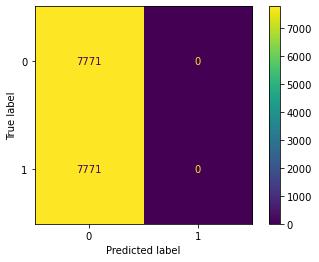

In [36]:
# Rodando o modelo Dummy
dummy = modelo(DummyClassifier(random_state = SEED))
dummy_pred = predicao(dummy)
metricas(y_test, dummy_pred)

Score de Treino: 1.000
O Score de Teste: 0.895
A acurácia do modelo foi de 89.46%
A precisão do modelo foi de 89.12%
A taxa de recall do modelo foi de 89.90%
A taxa de balanceamento do modelo foi de 89.51%


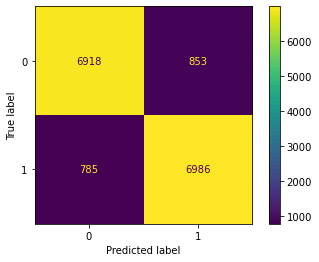

In [37]:
# Rodando o modelo DecisionTree
dct = modelo(DecisionTreeClassifier(random_state= SEED))
dct_pred = predicao(dct)
metricas(y_test, dct_pred)

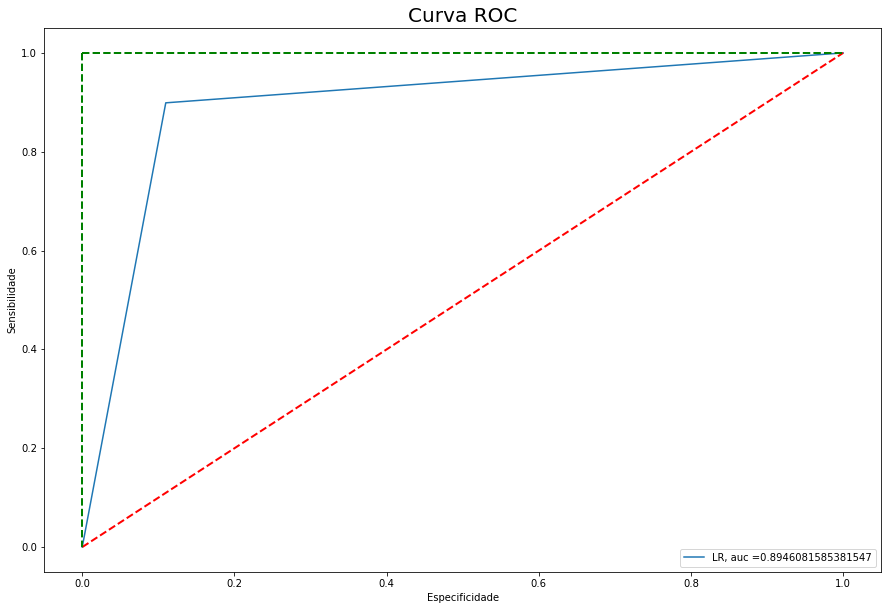

In [38]:
#Plotando a curva roc do DecisionTree
auc_roc(dct, X_test, y_test)

Score de Treino: 0.834
O Score de Teste: 0.833
A acurácia do modelo foi de 83.35%
A precisão do modelo foi de 90.32%
A taxa de recall do modelo foi de 74.70%
A taxa de balanceamento do modelo foi de 81.77%


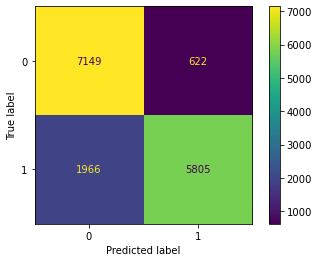

In [39]:
#Rodando o modelo RandomForest
rf = modelo(RandomForestClassifier(max_depth= 5, random_state= SEED))
rf_pred = predicao(rf)
metricas(y_test, rf_pred)

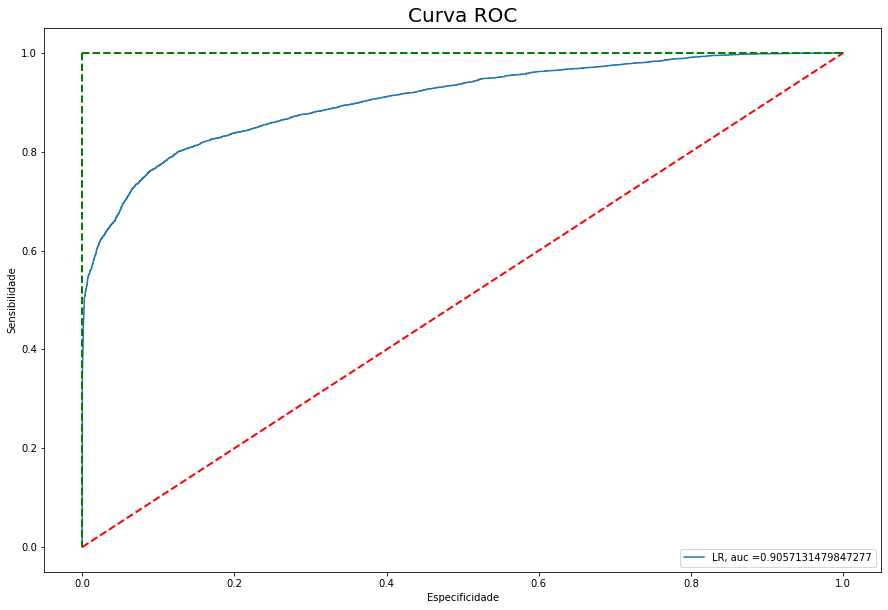

In [40]:
# Plotando a curva para o RandomForest
auc_roc(rf, X_test, y_test)

Score de Treino: 0.937
O Score de Teste: 0.931
A acurácia do modelo foi de 93.09%
A precisão do modelo foi de 97.92%
A taxa de recall do modelo foi de 88.05%
A taxa de balanceamento do modelo foi de 92.72%


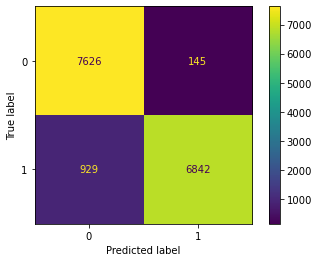

In [41]:
# Rodando o GradientBoosting
gb = modelo(GradientBoostingClassifier(max_depth= 5, random_state= SEED))
gb_pred = predicao(gb)
metricas(y_test, gb_pred)

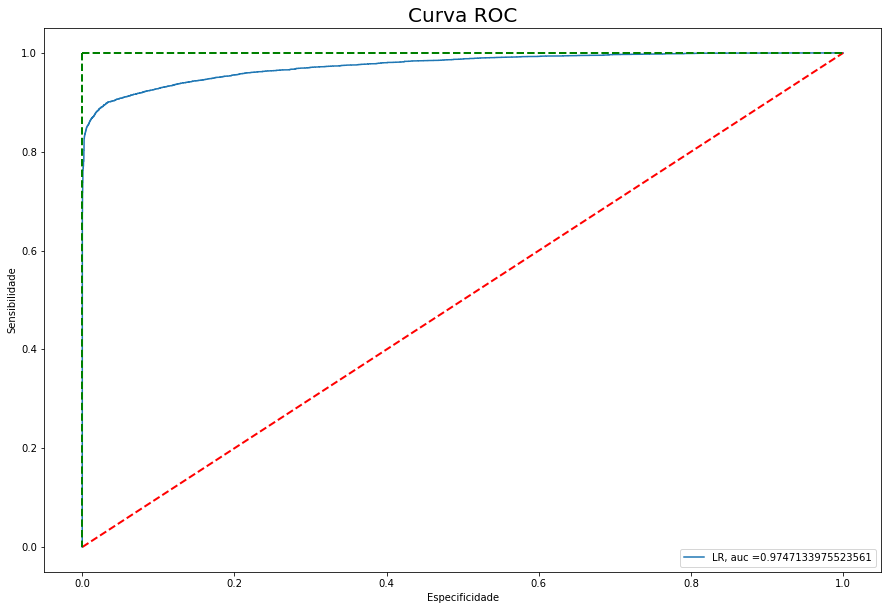

In [42]:
#Plotando a curva para o GrandientBoosting
auc_roc(gb, X_test, y_test)

O problema enfrentado pelo banco está relacionado ao aumento da inadimplência, logo seria primordial que o modelo selecionado seja capaz de diferenciar, com a maior eficácia possível, qual é o provável cliente inadimplente e o não inadimplente.

Neste contexto, acredito que seja interessante  combinar os resultados obtidos com a matrix de confusão, observando os modelos que apresentaram uma melhor classificação dos verdadeiros positivos e falsos negativos, e o valor da área sob a curva, porque quanto melhor o modelo for na diferenciação entre as classes, maior será o valor da **AUC**.

Dentre os modelos testados, o modelo **RandomForestClassifier** e o **GradientBoostingClassifier** apresentaram o melhor desempenho e por isso seguirão para a etapa de otimização. Vale destacar que buscarei otimizar o valor do **auc_roc** em ambos os modelos antes de eleger o melhor.

## Otimização dos modelos

In [43]:
# Importando as ferramentas de otimização e validação
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize

In [44]:
def roda_modelo(parametro):
    n_estimators = parametro[0]
    max_depth = parametro[1]
    min_samples_split = parametro[2]
    min_samples_leaf = parametro[3]
    max_leaf_nodes = parametro[4]
    
   
    best_rf = RandomForestClassifier(n_estimators = n_estimators, max_depth= max_depth,
                                     min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf,
                                     max_leaf_nodes = max_leaf_nodes, random_state = SEED)
    
    best_rf.fit(X_train,y_train)
      
    prob = best_rf.predict_proba(X_test)[:,1]
    
    return -roc_auc_score(y_test, prob)

parametro = [(150, 400), # n_estimators
            (3, 8, 'log-uniform'), # max_depth
            (4, 120), # min_samples_split
            (2, 120), # min_samples_leaf
            (8, 256)] # max_leaf_nodes


resultado_rf = gp_minimize(roda_modelo, parametro, random_state = SEED,
                           n_calls = 50, n_random_starts= 23)
resultado_rf.x

[150, 8, 4, 2, 214]

Score de Treino do modelo rf_otm: 0.858
O Score de Teste do modelo rf_otm: 0.852


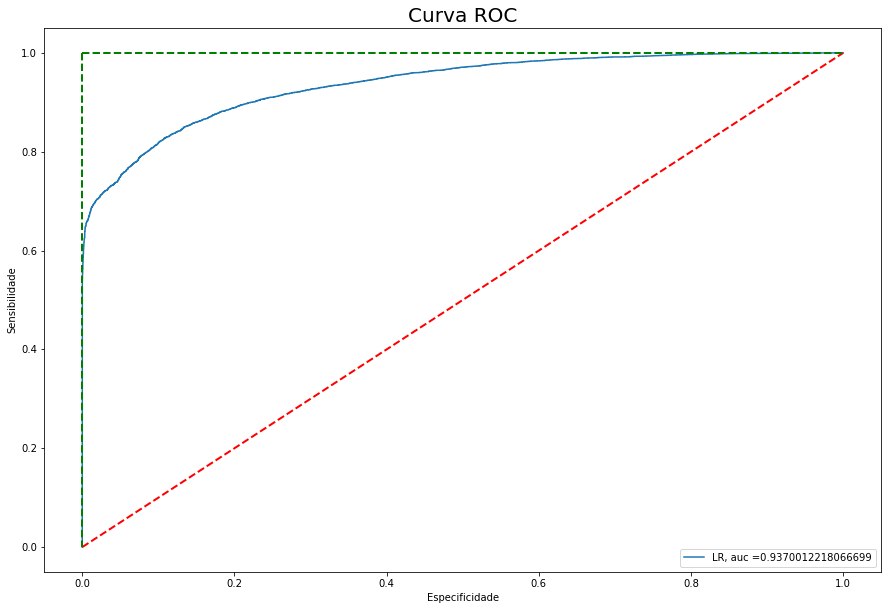

In [45]:
# Treinando o modelo RandomForestClassifier com os melhores parâmetros

rf_otm = RandomForestClassifier(n_estimators = 150, max_depth= 8,
                                min_samples_split = 4, min_samples_leaf = 2, max_leaf_nodes = 214, random_state = SEED)

rf_otm.fit(X_train, y_train)

print('Score de Treino do modelo rf_otm: %.3f'%rf_otm.score(X_train, y_train))
print('O Score de Teste do modelo rf_otm: %.3f'%rf_otm.score(X_test, y_test))

auc_roc(rf_otm, X_test, y_test)

In [46]:
def roda_modelo2(parametros):
    learning_rate = parametros[0]
    subsample = parametros[1]
    min_samples_split = parametros[2]
    min_samples_leaf = parametros[3]
    max_leaf_nodes = parametros[4]
   
#Instaciando o modelo GradientBoostingClassifier
    best_gb = GradientBoostingClassifier(learning_rate= learning_rate, n_estimators= 500,
                                        subsample= subsample, min_samples_split= min_samples_split,
                                        min_samples_leaf = min_samples_leaf, max_leaf_nodes = max_leaf_nodes, 
                                        random_state = SEED)
    best_gb.fit(X_train, y_train)
    
    prob = best_gb.predict_proba(X_test)[:,1]
    
    return -roc_auc_score(y_test, prob)

#Definindo os parametros

parametros = [(1e-5, 1e-1, 'log-uniform'), #learning_rate
             (0.05, 1.0), # subsample
             (0.05, 0.3), # min_samples_split
             (0.02, 0.2), # min_samples_leaf
             (8, 256)]    # max_leaf_nodes

#Rodando o otimizador
resultado_gb = gp_minimize(roda_modelo2, parametros, random_state= SEED, n_calls = 60,
                           n_random_starts = 30)    

resultado_gb.x

[0.1, 0.9327799477883357, 0.05, 0.02, 256]

A acurácia de Treino do modelo gb_otm: 0.943
A acurácia de Teste do modelo gb_otm: 0.939


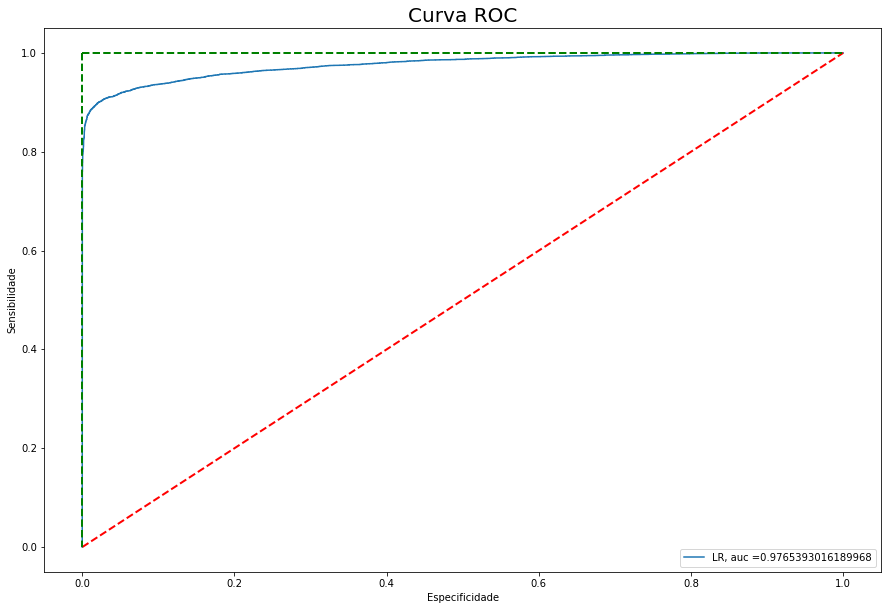

In [47]:
#Treinando o modelo GradientBoostingClassifier

gb_otm = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 500,
                                    subsample= 0.933, min_samples_split= 0.05,
                                    min_samples_leaf = 0.02, max_leaf_nodes = 256, random_state = SEED)

gb_otm.fit(X_train, y_train)

print('A acurácia de Treino do modelo gb_otm: %.3f'%gb_otm.score(X_train, y_train))
print('A acurácia de Teste do modelo gb_otm: %.3f'%gb_otm.score(X_test, y_test))

auc_roc(gb_otm, X_test, y_test)

Após realizar a otimização dos parâmetros de ambos os modelos, também se faz necessário realizar a validação. Esse processo irá mostrar se o modelo tem um bom poder de generalização para novos dados, ou seja, se ele obtêm resultados próximo quando testado com um conjunto de dados diferente dos dados utilizados nos treinos.

As ferramentas utilizadas para verificar esse poder de generalização são o **StratifiedKFold** e o **cross_val_score** que irão separar os dados em 10 amostras diferentes, realizar o treino do modelo com uma destas amostras e testar com as outras 9, retornando 10 scores diferentes e com esses resultados será possível calcular uma média e o desvio padrão.

In [48]:
# Validação do modelo RandomForest (Oversampling)
# Definindo o cv
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state= SEED)

# Calculando o score 
score_rf = cross_val_score(rf_otm, X1, y, cv = cv, scoring = 'roc_auc')

# Calculando a média e o desvio padrão
media_rf = score_rf.mean()*100
desv_pad_rf = score_rf.std()*100

# Observando o intervalo esperado de AUC_score
print('Os scores encontrados foram [%.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f]' %(score_rf[0],score_rf[1], score_rf[2], score_rf[3], score_rf[4], score_rf[5], score_rf[6], score_rf[7], score_rf[8], score_rf[9]))
print('A AUC-ROC média deste modelo é de %.2f%%'%media_rf)
print('Espera-se que as areas sob a curva encontradas com esse modelo esteja entre [%.2f%%, %.2f%%]'%(media_rf - 2*desv_pad_rf, media_rf + 2* desv_pad_rf))

Os scores encontrados foram [0.931, 0.938, 0.929, 0.933, 0.928, 0.933, 0.935, 0.936, 0.944, 0.929]
A AUC-ROC média deste modelo é de 93.36%
Espera-se que as areas sob a curva encontradas com esse modelo esteja entre [92.40%, 94.32%]


In [49]:
# Validação do modelo GradientBoosting (Oversampling)
# Definindo o cv
cv = StratifiedKFold(n_splits = 10, shuffle= True, random_state= SEED)

# Calculando o score 
score_gb = cross_val_score(gb_otm, X1, y, cv = cv, scoring = 'roc_auc')

# Calculando a média e o desvio padrão
media_gb = score_gb.mean()*100
desv_pad_gb = score_gb.std()*100

# Observando o intervalo esperado de AUC_score
print('Os scores encontrados foram [%.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f]' %(score_gb[0],score_gb[1], score_gb[2], score_gb[3], score_gb[4], score_gb[5], score_gb[6], score_gb[7], score_gb[8], score_gb[9]))
print('A AUC-ROC média deste modelo é de %.2f%%'%media_gb)
print('Espera-se que as areas sob a curva encontradas com esse modelo esteja entre [%.2f%%, %.2f%%]'%(media_gb - 2*desv_pad_gb, media_gb + 2* desv_pad_gb))

Os scores encontrados foram [0.978, 0.980, 0.973, 0.977, 0.977, 0.978, 0.978, 0.977, 0.978, 0.974]
A AUC-ROC média deste modelo é de 97.69%
Espera-se que as areas sob a curva encontradas com esse modelo esteja entre [97.33%, 98.05%]


Dentre os dois modelos testado, o **GradientBoosting** foi o que apresentou uma melhor consistência, relativa os resultados obtidos com a validação cruzada, além de uma maior area sob a curva com uma média de 97.69%.  

In [50]:
# Rodando o modelo com todos os dados

modelo_gb = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 500,
                                    subsample= 0.933, min_samples_split= 0.05,
                                    min_samples_leaf = 0.02, max_leaf_nodes = 256, random_state = SEED)
modelo_gb.fit(X1, y)

GradientBoostingClassifier(max_leaf_nodes=256, min_samples_leaf=0.02,
                           min_samples_split=0.05, n_estimators=500,
                           random_state=1457, subsample=0.933)

In [51]:
# Salvando o modelo, o Standard scaler e o Onehot encoder com pickle.
import pickle

with open('../Modelo/modelo_AluraCash.pkl','wb') as file:
    pickle.dump(modelo_gb, file)

with open('../Modelo/onehot_AluraCash.pkl','wb') as file:
    pickle.dump(encoding, file)

with open('../Modelo/Scaler_AluraCash.pkl', 'wb') as file:
    pickle.dump(scaler, file)